<a href="https://colab.research.google.com/github/AmiraKarouii/Linkedin/blob/main/YoteqiTechnicalTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **LinkedIn Job Listings Extraction**

***Approach to Scraping:***

> The extraction methodology entails utilizing external access (non-logged-in) to LinkedIn job listings through Python’s `requests` library paired with BeautifulSoup. The script initiates by accessing the base URL and parsing HTML content to extract links directing to individual job postings. It iterates through these links, capturing diverse job details such as title, company name, number of applicants, posting time, along with additional criteria like seniority level, employment type, job function, and industries.

***Challenges and Techniques:***

1. **Multilingual Complexity:** LinkedIn's diverse language presentations pose a challenge for data extraction. Techniques involving language-specific parsing, such as utilizing language identification libraries, language-specific attribute targeting, or employing translation APIs alongside scraping, could aid in handling this diversity.

2. **Dynamic Content Handling:** Employing strategies to navigate dynamic content, including timed pauses (`time.sleep()`), simulated browsing patterns, and dynamic user-agent rotation, helps mimic human behavior, enhancing the scraping process.

3. **Utilization of Specialized Techniques:** Implementing advanced parsing techniques within BeautifulSoup, such as `select()` with various CSS selectors and leveraging XPath for intricate element targeting, can bolster the extraction process in handling varied language structures.

***Integration of External Access:***

Recognizing the complexities associated with extracting data from LinkedIn, leveraging an external (non-logged-in) account to access job listings offers a pragmatic approach. External access minimizes restrictions related to account-specific limitations and enhances the capability to retrieve data without relying on session-dependent information.

***Recommendation for Further Enhancement:***

Considering the multilingual nature of LinkedIn's platform, exploring additional techniques such as language detection libraries, translation APIs for standardization, and the integration of more robust parsing strategies like XPath targeting can potentially mitigate challenges posed by diverse language structures.

***Conclusion:***

The amalgamation of external account access and advanced parsing techniques like language-specific parsing, dynamic content handling, and specialized targeting methods within BeautifulSoup and requests library enables a more robust and comprehensive approach to extract LinkedIn job listings. These methodologies not only enhance the data retrieval process but also pave the way for overcoming multilingual complexities within the platform.



In [9]:
import requests
from bs4 import BeautifulSoup
import csv
import time

url = "https://www.linkedin.com/jobs/search?keywords=data%20analyst&location=worldwide&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0&currentJobId=3778643230"
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content, "html.parser")

job_data = []
job_count = 0

while job_count < 20:
    list_items = soup.find_all("li")

    for li in list_items:
        link_tag = li.find("a")
        if link_tag and link_tag.has_attr("href"):
            href = link_tag["href"]
            try:
                response = requests.get(href)
                time.sleep(5)
                content = response.content
                time.sleep(5)
                soup = BeautifulSoup(content, "html.parser")

                job_title = soup.find('h1', class_='top-card-layout__title')
                job_title = job_title.text.strip() if job_title else "N/A"

                company_name = soup.find('a', class_='topcard__org-name-link')
                company_name = company_name.text.strip() if company_name else "N/A"

                num_applicants_element = soup.find('figcaption', class_='num-applicants__caption')
                if num_applicants_element:
                    num_applicants = num_applicants_element.text.strip()
                else:
                    num_applicants_element = soup.find('span', class_='num-applicants__caption')
                    num_applicants = num_applicants_element.text.strip() if num_applicants_element else "N/A"

                posted_time = soup.find('span', class_='posted-time-ago__text')
                posted_time = posted_time.text.strip() if posted_time else "N/A"

                criteria_list = soup.find_all("li")
                additional_info = {}
                for item in criteria_list:
                    try:
                        criteria = item.find("h3")
                        value = item.find("span")
                        if criteria and value:
                            additional_info[criteria.text.strip()] = value.text.strip()
                    except Exception as e:
                        print(f"Failed to extract additional info: {e}")


                if all(field in (None, 'N/A', '') for field in fields_to_check) and all(field in (None, 'N/A', '') for field in additional_fields):
                    print("All fields are NaN. Skipping job...")
                    continue  # Skip this job if all fields are empty or 'N/A'

                job_data.append([
                    job_title, company_name, num_applicants, posted_time, href,
                    additional_info.get('Seniority level', ''),
                    additional_info.get('Employment type', ''),
                    additional_info.get('Job function', ''),
                    additional_info.get('Industries', '')
                ])

                job_count += 1
                print(f"Extracted job {job_count}: {job_title}")
                if job_count >= 20:
                    break
            except Exception as e:
                print(f"Failed to fetch URL: {href}")
                print(f"Error: {e}")

    next_page = soup.find("a", class_="next")
    if next_page and next_page.has_attr("href"):
        next_page_url = next_page["href"]
        time.sleep(5)
        response = requests.get(next_page_url)
        html_content = response.content
        time.sleep(5)
        soup = BeautifulSoup(html_content, "html.parser")
    else:
        break

with open('job_data.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow([
        'Job Title', 'Company Name', 'Number of Applicants', 'Posted Time', 'URL',
        'Seniority Level', 'Employment Type', 'Job Function', 'Industry'
    ])
    writer.writerows(job_data)

print("Data saved into 'job_data.csv' file.")


Extracted job 1: Junior Data Analyst
Extracted job 2: Data Analyst
Extracted job 3: Senior Data Analyst
Extracted job 4: Customer Service Data Analyst
Extracted job 5: Data Analyst
Extracted job 6: Data Analyst
Extracted job 7: N/A
Extracted job 8: Data Analyst
Extracted job 9: Junior Data Analyst (Fresh grads)
Extracted job 10: Data Analyst
Extracted job 11: Data Analyst - Customer Behaviour Analytics
Extracted job 12: Graduate Data Analyst
Extracted job 13: Data & Analytics Analyst
Extracted job 14: Data Analyst
Extracted job 15: 🌳🌳🌳  Data Analyst - Remote  🌳🌳🌳
Extracted job 16: Analista de Datos para Control Interno y Cumplimiento
Extracted job 17: Junior Data Analyst
Extracted job 18: Data Analyst
Extracted job 19: Data Analyst
Extracted job 20: Data Analyst
Data saved into 'job_data.csv' file.


In [15]:
import pandas as pd

# Read the CSV file using pandas
df = pd.read_csv('job_data.csv')
df


,Job Title,Company Name,Number of Applicants,Posted Time,URL,Seniority Level,Employment Type,Job Function,Industry
0,Junior Data Analyst,Capgemini,Over 200 applicants,2 weeks ago,https://sg.linkedin.com/jobs/view/junior-data-...,Entry level,Full-time,"Information Technology, Business Development, ...","IT Services and IT Consulting, Financial Servi..."
1,Data Analyst,Capgemini,Over 200 applicants,1 week ago,https://sg.linkedin.com/jobs/view/data-analyst...,Entry level,Full-time,"Information Technology, Engineering, and Other","IT Services and IT Consulting, Software Develo..."
2,Senior Data Analyst,Roku Inc.,180 applicants,20 hours ago,https://www.linkedin.com/jobs/view/senior-data...,Mid-Senior level,Full-time,Information Technology,"Technology, Information and Media"
3,Customer Service Data Analyst,Coca-Cola Beverages Philippines,Mahigit sa 200 apliktante,1 linggo nakalipas,https://ph.linkedin.com/jobs/view/customer-ser...,Entry level,Full-time,Customer Service,Pagmamanupaktura
4,Data Analyst,Hotspex Media,Over 200 applicants,1 week ago,https://ca.linkedin.com/jobs/view/data-analyst...,Entry level,Full-time,Information Technology,Advertising Services
5,Data Analyst,PT. CS2 POLA SEHAT,26 pelamar,1 hari yang lalu,https://id.linkedin.com/jobs/view/data-analyst...,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,https://www.linkedin.com/jobs/view/data-analys...,NaN,NaN,NaN,NaN
7,Data Analyst,Capgemini,Over 200 applicants,1 week ago,https://sg.linkedin.com/jobs/view/data-analyst...,Entry level,Full-time,"Information Technology, Engineering, and Other","IT Services and IT Consulting, Software Develo..."
8,Junior Data Analyst (Fresh grads),Salt,Lebih 200 pemohon,1 minggu yang lalu,https://my.linkedin.com/jobs/view/junior-data-...,NaN,NaN,NaN,NaN
9,Data Analyst,ADP,Over 200 applicants,1 day ago,https://in.linkedin.com/jobs/view/data-analyst...,Associate,Full-time,Information Technology,IT Services and IT Consulting


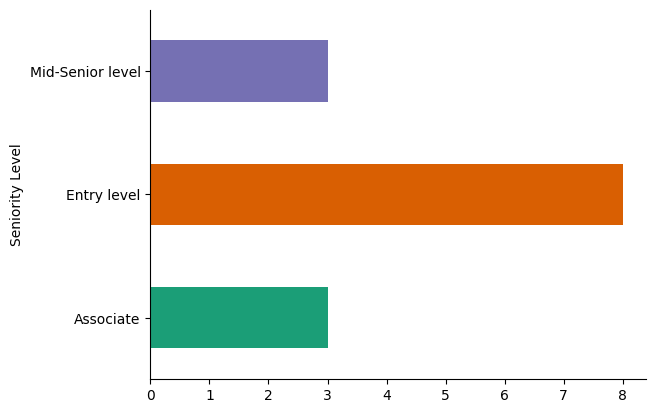

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_15.groupby('Seniority Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)